In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from scipy import *



Table=pd.read_csv(r'C:\bootcamo\TablaLimpia.csv')
#df2=pd.read_csv(r'C:\bootcamo\city_data.csv')
table
Table["saldo_pesosE"] = Table["vsm_enero"]*Table["RemainingDebt_enero"]
Table["saldo_pesosF"] = Table["vsm_febrero"]*Table["RemainingDebt_febrero"]
Table["DueDaysE"] = Table["PagosVencidos_enero"]*30
Table["DueDaysF"] = Table["PagosVencidos_febrero"]*30
Table.head()
Performance_Stay = Table.loc[Table["DueDaysE"] == Table["DueDaysF"] , :]
Performance_Stay["Performance"] = "stay"
Performance_Stay.head()
#Performance_Stay.count()
Performance_Rol = Table.loc[Table["DueDaysE"] < Table["DueDaysF"] , :]
Performance_Rol["Performance"] = "Roll"
Performance_Rol.head()
Performance_Cure = Table.loc[Table["DueDaysE"] > Table["DueDaysF"] , :]
Performance_Cure["Performance"] = "Cure"
Performance_Cure.head()
PerformanceT = [Performance_Stay, Performance_Rol, Performance_Cure]
result = pd.concat(PerformanceT).reset_index()
result.head()


C:\Users\430010950\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\430010950\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\430010950\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,index,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,Performance
0,0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco,545797.59936,549128.41792,0,0,stay
1,1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco,114913.24032,114510.31872,0,0,stay
2,2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco,512059.63072,510018.16128,0,0,stay
3,3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco,139679.48800,139169.12064,0,0,stay
4,4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco,523395.15840,530647.74720,0,0,stay


In [143]:
result["jump"] = result["DueDaysF"] - result["DueDaysE"]
result.head()

,index,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,Performance,jump
0,0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco,545797.59936,549128.41792,0,0,stay,0
1,1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco,114913.24032,114510.31872,0,0,stay,0
2,2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco,512059.63072,510018.16128,0,0,stay,0
3,3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco,139679.48800,139169.12064,0,0,stay,0
4,4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco,523395.15840,530647.74720,0,0,stay,0


In [144]:
result['pay_nopay'] = np.where(result['DueDaysF']>=90, 1, 0)
result['pay_nopay'].value_counts()

0    18343
1      103
Name: pay_nopay, dtype: int64

In [145]:
result.head()

,index,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,Performance,jump,pay_nopay
0,0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco,545797.59936,549128.41792,0,0,stay,0,0
1,1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco,114913.24032,114510.31872,0,0,stay,0,0
2,2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco,512059.63072,510018.16128,0,0,stay,0,0
3,3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco,139679.48800,139169.12064,0,0,stay,0,0
4,4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco,523395.15840,530647.74720,0,0,stay,0,0


In [146]:
tab1=pd.pivot_table(result,index=["estado"],values=['pay_nopay'],aggfunc='sum')
tab1

tab2=pd.pivot_table(result,index=["estado"],values=['key'],aggfunc='count')
tab2

tu1= pd.merge(tab1,tab2, on='estado',how='inner')
tu1.head()

,pay_nopay,key
estado,,
Aguascalientes,0,161
Baja California,11,1985
Baja California Sur,3,579
Campeche,1,24
Chiapas,1,197


In [147]:
tu1["delq_rate"] = tu1["pay_nopay"]/tu1["key"]
tu1.head()

,pay_nopay,key,delq_rate
estado,,,
Aguascalientes,0,161,0.000000
Baja California,11,1985,0.005542
Baja California Sur,3,579,0.005181
Campeche,1,24,0.041667
Chiapas,1,197,0.005076


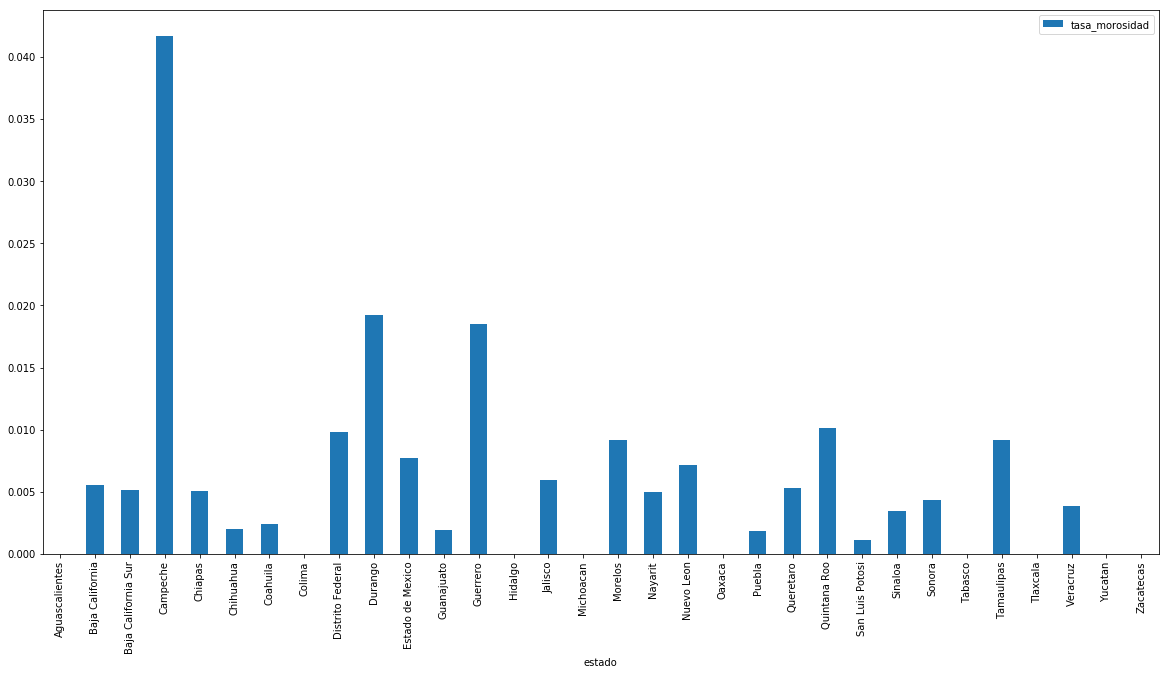

In [164]:
tasa_morosidad=tu1.delq_rate
creditos=tu1.key
index=tu1.index

grafica=pd.DataFrame({'tasa_morosidad': tasa_morosidad},
                       index=index)

ax=grafica.plot.bar(figsize=(20,10),rot=90)


In [149]:
df3= pd.read_excel(open('C:\JAL CS\ind_delincuencia3.xlsx','rb'), sheetname='ind_delincuencia2')
df3.head()

C:\Users\430010950\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,estado,ind_delic
0,Aguascalientes,39912
1,Baja California,43921
2,Baja California Sur,25690
3,Campeche,28283
4,Chiapas,20464


In [150]:
tu3= pd.merge(tu1,df3, on='estado',how='left')
tu3.head()

,estado,pay_nopay,key,delq_rate,ind_delic
0,Aguascalientes,0,161,0.000000,39912
1,Baja California,11,1985,0.005542,43921
2,Baja California Sur,3,579,0.005181,25690
3,Campeche,1,24,0.041667,28283
4,Chiapas,1,197,0.005076,20464


In [151]:
tab1=pd.pivot_table(tu3,index=["estado"],values=['delq_rate','ind_delic'],aggfunc='mean')


In [152]:
tab1.to_csv('C:\JAL CS\estado.csv',index=False)

In [153]:
tab1['delqrate_porc']=(tab1.delq_rate/tab1.delq_rate.sum()*100)
tab1['inddelic_porc']=(tab1.ind_delic/tab1.ind_delic.sum()*100)
tab1.sort_values(by='delq_rate',ascending=True)

tab1.head()

,delq_rate,ind_delic,delqrate_porc,inddelic_porc
estado,,,,
Aguascalientes,0.000000,39912,0.000000,3.675152
Baja California,0.005542,43921,2.986662,4.044306
Baja California Sur,0.005181,25690,2.792521,2.365570
Campeche,0.041667,28283,22.456527,2.604337
Chiapas,0.005076,20464,2.735821,1.884353


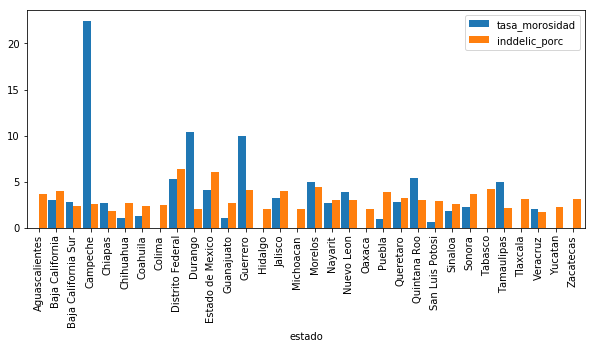

In [160]:
tasa_morosidad=tab1.delqrate_porc
inddelic_porc=tab1.inddelic_porc
index=tu1.index

grafica=pd.DataFrame({'tasa_morosidad': tasa_morosidad,
                       'inddelic_porc':inddelic_porc},
                       index=index)


ax=grafica.plot.bar(figsize=(10,4),rot=90,width=0.9)


In [125]:
x=tab1.delqrate_porc
y=tab1.inddelic_porc

x.corr(y)

0.09149347302063955

In [181]:
bbva= pd.read_csv(r'C:\JAL CS\TasaMoraBBVAxEstadoCNBV.csv')
bbva.head()

,estado,delq_act,201904,201903,201902,201901,201812,201811,201810,201809,201808,201807,201806
0,Aguascalientes,3.80,3.74,3.66,3.49,3.71,3.67,3.73,3.83,3.63,3.55,3.69,3.94
1,Baja California,5.73,5.88,5.86,5.97,6.54,6.80,7.24,7.48,7.00,6.94,7.19,7.77
2,Baja California Sur,7.69,7.91,7.91,8.09,8.60,8.88,8.92,9.34,8.81,8.77,8.96,9.92
3,Campeche,7.00,6.98,7.23,7.29,7.49,7.78,7.63,7.61,7.37,7.52,7.68,7.18
4,Chiapas,5.37,5.34,5.33,5.37,5.71,5.63,5.89,5.82,5.22,5.05,5.25,5.46


In [182]:
tbbva= pd.merge(tu3,bbva, on='estado',how='left')
tbbva.head()

,estado,pay_nopay,key,delq_rate,ind_delic,delq_act,201904,201903,201902,201901,201812,201811,201810,201809,201808,201807,201806
0,Aguascalientes,0,161,0.000000,39912,3.80,3.74,3.66,3.49,3.71,3.67,3.73,3.83,3.63,3.55,3.69,3.94
1,Baja California,11,1985,0.005542,43921,5.73,5.88,5.86,5.97,6.54,6.80,7.24,7.48,7.00,6.94,7.19,7.77
2,Baja California Sur,3,579,0.005181,25690,7.69,7.91,7.91,8.09,8.60,8.88,8.92,9.34,8.81,8.77,8.96,9.92
3,Campeche,1,24,0.041667,28283,7.00,6.98,7.23,7.29,7.49,7.78,7.63,7.61,7.37,7.52,7.68,7.18
4,Chiapas,1,197,0.005076,20464,5.37,5.34,5.33,5.37,5.71,5.63,5.89,5.82,5.22,5.05,5.25,5.46


In [183]:
tbbva2=pd.pivot_table(tbbva,index=["estado"],values=['delq_rate','delq_act'],aggfunc='mean')
tbbva2

,delq_act,delq_rate
estado,,
Aguascalientes,3.80,0.000000
Baja California,5.73,0.005542
Baja California Sur,7.69,0.005181
Campeche,7.00,0.041667
Chiapas,5.37,0.005076
Chihuahua,5.82,0.002043
Coahuila,7.02,0.002445
Colima,5.25,0.000000
Distrito Federal,3.30,0.009804


In [189]:
tbbva2['delqrate_porc']=(tbbva2.delq_rate/tbbva2.delq_rate.sum()*100)
tbbva2['delqratebbva_porc']=(tbbva2.delq_act/tbbva2.delq_act.sum()*100)

tbbva2.head()

,delq_act,delq_rate,delqrate_porc,delqratebbva_porc
estado,,,,
Aguascalientes,3.80,0.000000,0.000000,2.030782
Baja California,5.73,0.005542,2.986662,3.062206
Baja California Sur,7.69,0.005181,2.792521,4.109662
Campeche,7.00,0.041667,22.456527,3.740915
Chiapas,5.37,0.005076,2.735821,2.869816


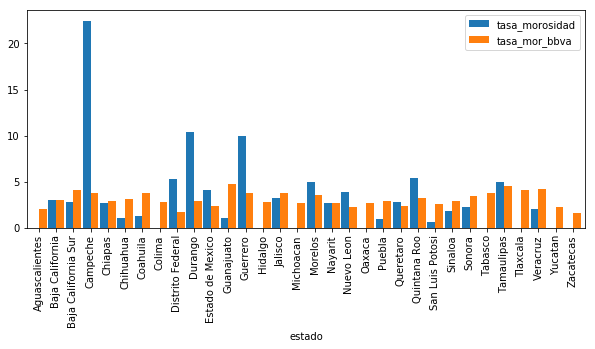

In [190]:
tasa_morosidad=tbbva2.delqrate_porc
tasa_mor_bbva=tbbva2.delqratebbva_porc
index=tbbva2.index

grafica=pd.DataFrame({'tasa_morosidad': tasa_morosidad,
                       'tasa_mor_bbva':tasa_mor_bbva},
                       index=index)


ax=grafica.plot.bar(figsize=(10,4),rot=90,width=0.9)

In [191]:
x=tbbva2.delqrate_porc
y=tbbva2.delqratebbva_porc

x.corr(y)

0.19376044903811102